In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

### *Basic data information viewed in 'Data Summary.ipynb'*
### *Evaluations inspired by others' Instacart kernel contributions*

### Orders Data Set

In [2]:
# Let's take a look at the orders data first
orders_df = pd.read_csv('input/orders.csv')

In [3]:
# Orders per eval_set object
orders_df.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

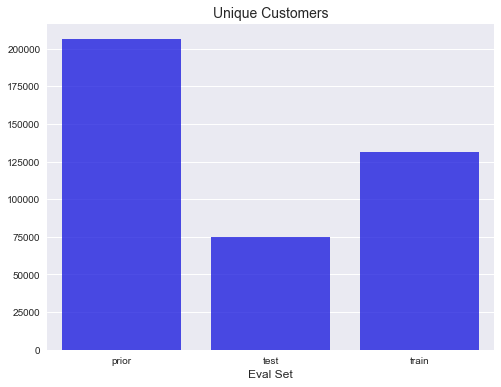

In [4]:
# Unique customers per eval_set object
user_cnt = orders_df.groupby('eval_set')['user_id'].nunique()

plt.figure(figsize=(8,6))
sns.barplot(user_cnt.index, user_cnt.values, color='b', alpha=0.8)
plt.title('Unique Customers', fontsize=14)
plt.xlabel('Eval Set', fontsize=12)
plt.show()

In [5]:
# Count of customer orders
order_cnt = orders_df.groupby('user_id')['order_number'].max().reset_index()
order_cnt['order_number'].value_counts().head(10)

4     23986
5     19590
6     16165
7     13850
8     11700
9     10190
10     9032
11     7815
12     6952
13     6236
Name: order_number, dtype: int64

In [6]:
order_cnt['order_number'].value_counts().tail()

94    57
91    56
97    54
98    50
99    47
Name: order_number, dtype: int64

** This confirms there is a minimum of 4 and a maximum of 100 customer orders **

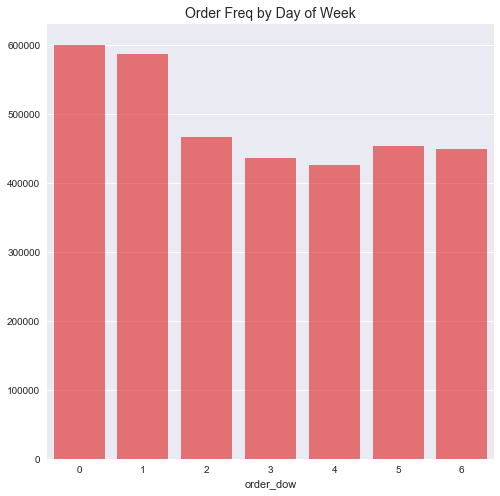

In [7]:
# Order frequency by day of week
order_cnt = orders_df.groupby('order_dow')['order_id'].size()
plt.figure(figsize=(8,8))
sns.barplot(order_cnt.index, order_cnt.values, color='r', alpha=0.6)
plt.title('Order Freq by Day of Week', fontsize=14)
plt.show()

** It is likely that the weekday numbering starts on Sunday, revealing that most orders are placed on Sunday and Monday. **

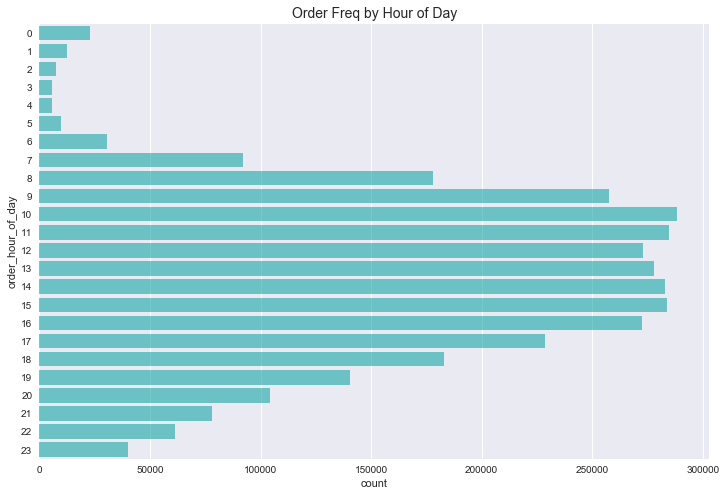

In [8]:
# Order frequency by hour
plt.figure(figsize=(12,8))
sns.countplot(y=orders_df.order_hour_of_day, color='c', alpha=0.6)
plt.title('Order Freq by Hour of Day', fontsize=14)
plt.show()

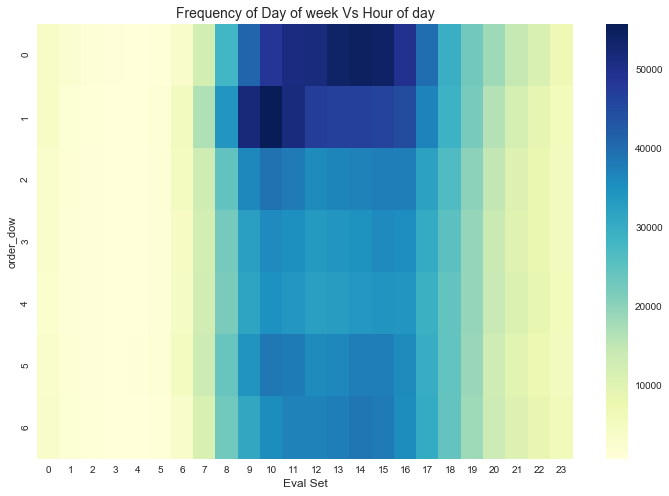

In [9]:
# Orders by day of week and hour of day
plt.figure(figsize=(12,8))
order_cnt = orders_df.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
order_cnt = order_cnt.pivot( 'order_dow', 'order_hour_of_day', 'order_number')
sns.heatmap(order_cnt, cmap='YlGnBu')
plt.xlabel('Eval Set', fontsize=12)
plt.title('Frequency of Day of week Vs Hour of day', fontsize=14)
plt.show()

** The majority of orders are placed on Sunday and Monday between 9am and 5pm **

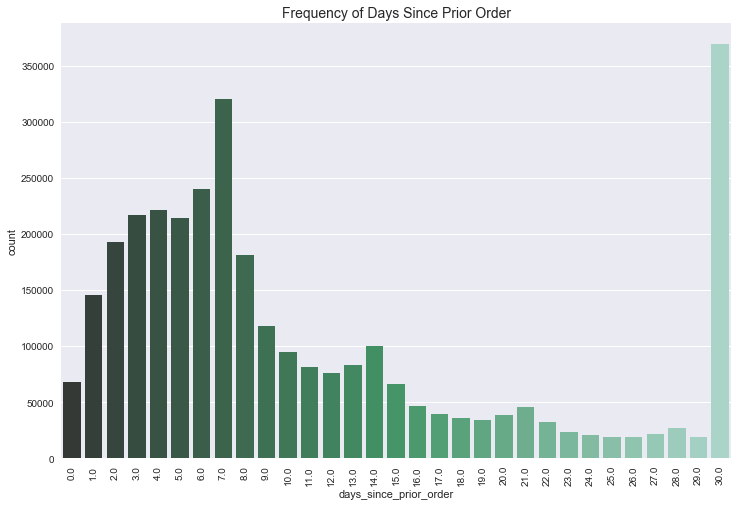

In [10]:
# Days since last order
plt.figure(figsize=(12,8))
sns.countplot(orders_df.days_since_prior_order, palette='BuGn_d')
plt.xticks(rotation='vertical')
plt.title('Frequency of Days Since Prior Order', fontsize=14)
plt.show()

** We see a spike in weekly orders as well as occassional orders greater than 30 days. **

### Orders Prior Data Set Combined with Product, Aisle, and Department Dictionaries

In [11]:
order_products_prior_df = pd.read_csv('input/order_products__prior.csv')
products_df = pd.read_csv('input/products.csv')
aisles_df = pd.read_csv('input/aisles.csv')
departments_df = pd.read_csv('input/departments.csv')

In [12]:
products_df = pd.merge(products_df, aisles_df, on='aisle_id', how='left').merge(departments_df, on='department_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [13]:
# Top selling products
order_products_prior_df['product_name'].value_counts().head(20)

Banana                      472565
Bag of Organic Bananas      379450
Organic Strawberries        264683
Organic Baby Spinach        241921
Organic Hass Avocado        213584
Organic Avocado             176815
Large Lemon                 152657
Strawberries                142951
Limes                       140627
Organic Whole Milk          137905
Organic Raspberries         137057
Organic Yellow Onion        113426
Organic Garlic              109778
Organic Zucchini            104823
Organic Blueberries         100060
Cucumber Kirby               97315
Organic Fuji Apple           89632
Organic Lemon                87746
Apple Honeycrisp Organic     85020
Organic Grape Tomatoes       84255
Name: product_name, dtype: int64

In [14]:
# Departments with most ordered products
order_products_prior_df['department'].value_counts().head(15)

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
Name: department, dtype: int64

In [15]:
# Aisles with most ordered products
order_products_prior_df['aisle'].value_counts().head(10) 

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
Name: aisle, dtype: int64

** Produce products, led by bananas are the leading sellers **

In [27]:
# Proprotion of products that are reodered
order_products_prior_df.reordered.sum() / order_products_prior_df.count()

order_id             0.589697
product_id           0.589697
add_to_cart_order    0.589697
reordered            0.589697
product_name         0.589697
aisle_id             0.589697
department_id        0.589697
aisle                0.589697
department           0.589697
dtype: float64

In [29]:
# Products with the highest reorder rate
order_products_prior_df.groupby(['product_name'])['reordered'].mean().sort_values(ascending=False).head(25) 

product_name
Raw Veggie Wrappers                                            0.941176
Serenity Ultimate Extrema Overnight Pads                       0.931034
Orange Energy Shots                                            0.923077
Chocolate Love Bar                                             0.920792
Soy Powder Infant Formula                                      0.914286
Simply Sleep Nighttime Sleep Aid                               0.911111
Energy Shot, Grape Flavor                                      0.909091
Sparking Water                                                 0.900000
Maca Buttercups                                                0.900000
Russian River Valley Reserve Pinot Noir                        0.900000
Bars Peanut Butter                                             0.895522
Soy Crisps Lightly Salted                                      0.893939
Jet Fuel Dark Roast Whole Bean Coffee                          0.892857
High Gravity Lager                                 

** There are a variety of products that comprise some of the most popular items for reordering. **

In [38]:
# Add to cart order and average reoder rate
order_products_prior_df.groupby(['add_to_cart_order'])['reordered'].mean().sort_values(ascending=False).head(20)

add_to_cart_order
1     0.677533
2     0.676251
3     0.658037
4     0.636958
96    0.636364
5     0.617383
6     0.600420
97    0.600000
7     0.585687
8     0.573247
93    0.571429
92    0.568627
98    0.566667
9     0.561474
10    0.551018
11    0.541014
12    0.532583
13    0.524776
14    0.516375
95    0.513514
Name: reordered, dtype: float64

** It looks like the first six products added to a user's cart is above the overall reorder average of 58.9%.
I'll have to look into why products placed late in the customer's cart to have such a high reorder rate. **

### Orders Train Data Set 

In [39]:
order_products_train_df = pd.read_csv('input/order_products__train.csv')
order_products_train_df = pd.merge(order_products_train_df, products_df, on='product_id', how='left')

In [41]:
# Proprotion of products that are reodered
order_products_train_df.reordered.sum() / order_products_train_df.count()

order_id             0.598594
product_id           0.598594
add_to_cart_order    0.598594
reordered            0.598594
product_name         0.598594
aisle_id             0.598594
department_id        0.598594
aisle                0.598594
department           0.598594
dtype: float64

** The training set has a slightly higher reorder average **

In [51]:
# Products with the highest reorder rate
order_products_train_df.groupby(['product_name'])['reordered'].mean().sort_values(ascending=False).head(25)

product_name
Performance Protein Vanilla Powder                  1.0
Strawberry Banana Fruit Sandwich Bar                1.0
Strawberry 1.76 Oz Dairy Snack                      1.0
Strawberry 100 Calorie Cottage Doubles              1.0
Black Tea Chai Chocolate Tea Bags                   1.0
Onion Flavored Bissli                               1.0
Strawberry Apple Sauce Fruit Pouches                1.0
Strawberry Apple Sauce To Go Packs                  1.0
Onion Crispbread                                    1.0
Ones Dried Plums                                    1.0
One Top Tomato Pizza Sauce                          1.0
Extra Grainy Cracked Wheat & Oats Bread             1.0
Stone Ground Dijon Mustard                          1.0
Once And Done Wipes                                 1.0
On-The-Go                                           1.0
Strawberry Banana Yogurt Bars                       1.0
Strawberry Blast Fruit & Chia Seed Bar              1.0
Strawberry Blast Kid's Honest Tooth

** There a number of products that always get reodered in the training set**

In [52]:
order_products_train_df.groupby(['product_name'])['reordered'].mean().head(10)

product_name
#2 Coffee Filters                                  0.363636
#2 Cone White Coffee Filters                       0.000000
#2 Mechanical Pencils                              0.000000
#4 Natural Brown Coffee Filters                    0.166667
& Go! Hazelnut Spread + Pretzel Sticks             0.600000
+Energy Black Cherry Vegetable & Fruit Juice       1.000000
0 Calorie Acai Raspberry Water Beverage            0.666667
0 Calorie Fuji Apple Pear Water Beverage           0.636364
0 Calorie Strawberry Dragonfruit Water Beverage    0.666667
0% Fat Black Cherry Greek Yogurt y                 0.777778
Name: reordered, dtype: float64

In [53]:
# Add to cart order and average reoder rate
order_products_prior_df.groupby(['add_to_cart_order'])['reordered'].mean().head(20)

add_to_cart_order
1     0.677533
2     0.676251
3     0.658037
4     0.636958
5     0.617383
6     0.600420
7     0.585687
8     0.573247
9     0.561474
10    0.551018
11    0.541014
12    0.532583
13    0.524776
14    0.516375
15    0.509190
16    0.502907
17    0.496008
18    0.490822
19    0.484905
20    0.479895
Name: reordered, dtype: float64

** Products appear to have have similar reorder rates based on the order they are added to the cart as the prior data set.**